
<p><b>Group :</b> AAI Group 3</p>
<p><b>Date :</b> 21 October 2024</p>
<p><b>Dataset :</b> Heart Disease</p>
<p><b>Contributors :</b> John Kalaiselvan, Prasanna G., Sai Ramanan M K</p>


## Introduction

Heart disease remains one of the leading causes of death globally, placing a significant burden on healthcare systems and affecting millions of people each year. Early detection and intervention can dramatically improve patient outcomes and reduce healthcare costs. However, identifying heart disease risk factors and making accurate predictions requires a thorough analysis of patient health data.

The dataset analyzed in this project contains various health indicators collected from 302 patients, including key attributes like age, cholesterol levels, blood pressure, chest pain type, and exercise-induced angina. The goal is to develop a machine learning model that accurately predicts whether a patient is likely to have heart disease based on these features.

We can explore the relationships between these health factors and the presence of heart disease with advanced statistics models such as GLM, t and Logistic Regression. By leveraging the power of data, we aim to assist healthcare providers in making more informed decisions, identifying at-risk patients earlier, and ultimately improving treatment outcomes.

In this analysis, we ethemultiple models to select the most accurate and reliable one for predicting heart disease, providing valuable insights into the key health factors that contribute to its onset.


## Overview of the Dataset

The dataset used for this analysis was sourced from [Kaggle](https://www.kaggle.com/datasets/krishujeniya/heart-diseae), a platform known for its wide variety of high-quality datasets for data science projects. The dataset consists of **302 patient records** with 14 attributes related to health, all aimed at predicting the likelihood of heart disease.

### Key Features in the Dataset:
1. **Age**: The age of the patient in years.
2. **Sex**: The gender of the patient (1 = male, 0 = female).
3. **Chest Pain Type (cp)**: Four types of chest pain experienced by the patient (1-4 scale).
4. **Resting Blood Pressure (trestbps)**: The patient’s resting blood pressure (in mm Hg).
5. **Cholesterol (chol)**: The patient’s serum cholesterol level (in mg/dL).
6. **Fasting Blood Sugar (fbs)**: Whether the patient's fasting blood sugar is above 120 mg/dL (1 = true, 0 = false).
7. **Resting ECG (restecg)**: Results of the resting electrocardiographic measurement (0-2 scale).
8. **Maximum Heart Rate (thalach)**: The maximum heart rate achieved during testing.
9. **Exercise-Induced Angina (exang)**: Whether exercise induced angina (1 = yes, 0 = no).
10. **Oldpeak**: ST depression induced by exercise relative to rest.
11. **Slope**: The slope of the peak exercise ST segment (1-3 scale).
12. **Number of Major Vessels (ca)**: The number of major vessels colored by fluoroscopy (0-3).
13. **Thalassemia (thal)**: Thalassemia blood disorder variable (1-3 scale).
14. **Target**: The target variable that indicates the presence of heart disease (1 = heart disease, 0 = no heart disease).

### Purpose of the Dataset:
The goal of the dataset is to predict whether a patient is at risk of heart disease based on their medical attributes. This dataset is particularly useful for training machine learning models to predict heart disease and for exploring the relationships between various health metrics and the presence of heart disease.

With these features, we can apply machine learning techniques to identify patterns and predict whether a patient is likely to suffer from heart disease, potentially helping in early diagnosis and improving patient care.


In [2]:
# Package Imports

import pandas as pd
from tabulate import tabulate
import seaborn as sns
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sn 
from scipy.stats import chi2_contingency, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
# Read the dataset

df = pd.read_csv("./heart-disease.csv")
print(f"The attributes in Heart Disease Dataset : \n{df.columns.to_list()}\n")
print(f"The shape of Dataset : \n{df.shape}")
df.head()

The attributes in Heart Disease Dataset : 
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

The shape of Dataset : 
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



<center><h1>Data Cleaning & Preparation</h1></center>

## Why We Need Data Cleaning & Preparation

**Data Cleaning & Preparation** is a crucial step in any data analysis or machine learning project. Raw data often contains errors, inconsistencies, or missing values that can significantly affect the accuracy and reliability of the models. Cleaning and preparing the data ensures that we have a high-quality dataset that can produce valid, accurate, and meaningful results.

### Key Reasons for Data Cleaning & Preparation:

1. **Handling Missing Values**:
   - Datasets often have missing values, which can lead to inaccurate model predictions or errors during model training.
   - Techniques like imputing missing values or removing incomplete records ensure that the dataset is robust and can be processed by machine learning algorithms.

2. **Removing Duplicates**:
   - Duplicate entries in a dataset can skew the results by giving undue importance to certain records. Removing duplicates ensures each observation is treated equally.

3. **Dealing with Outliers**:
   - Outliers are extreme values that may distort the results of statistical analysis or model predictions.
   - Identifying and handling outliers is essential to ensure the model focuses on typical patterns rather than extreme anomalies.

4. **Standardizing Data Formats**:
   - Inconsistent data formats (e.g., different units, date formats, or case sensitivity) can create challenges during analysis.
   - Standardizing formats (such as converting all dates to a common format or all text to lowercase) ensures consistency across the dataset.

5. **Ensuring Data Types Are Correct**:
   - Features must have the correct data type (e.g., numerical values for continuous variables, categorical data for categories).
   - Converting and validating the correct data types ensures models handle the features appropriately.

6. **Improving Model Performance**:
   - A well-prepared dataset leads to better model training and more accurate predictions.
   - Cleaning the data removes noise, focuses on the essential features, and allows machine learning algorithms to identify true patterns and relationships.

7. **Enhancing Interpretability**:
   - A clean dataset is easier to interpret, visualize, and communicate with stakeholders. 
   - Consistent and well-prepared data allows clearer insights and actionable business decisions.

### Conclusion:
Data Cleaning & Preparation is essential to maximize the value of your dataset and ensure the success of your analysis or machine learning project. By addressing inconsistencies, handling missing data, and standardizing formats, we create a foundation for accurate, reliable, and interpretable results.


### Step by Step cleaning the data
#### Removing missing Values

In [15]:
# Step 1: Check for missing values
missing_values = df.isnull().sum()

# Step 3: Remove duplicates
df = df.drop_duplicates()

# Output the summary of cleaning
print("Missing values :\n", missing_values)
print("\nShape of the dataset after cleaning(Removing Duplicates and Null records):", df.shape)

Missing values :
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Shape of the dataset after cleaning(Removing Duplicates and Null records): (276, 14)


### Removing Outliers

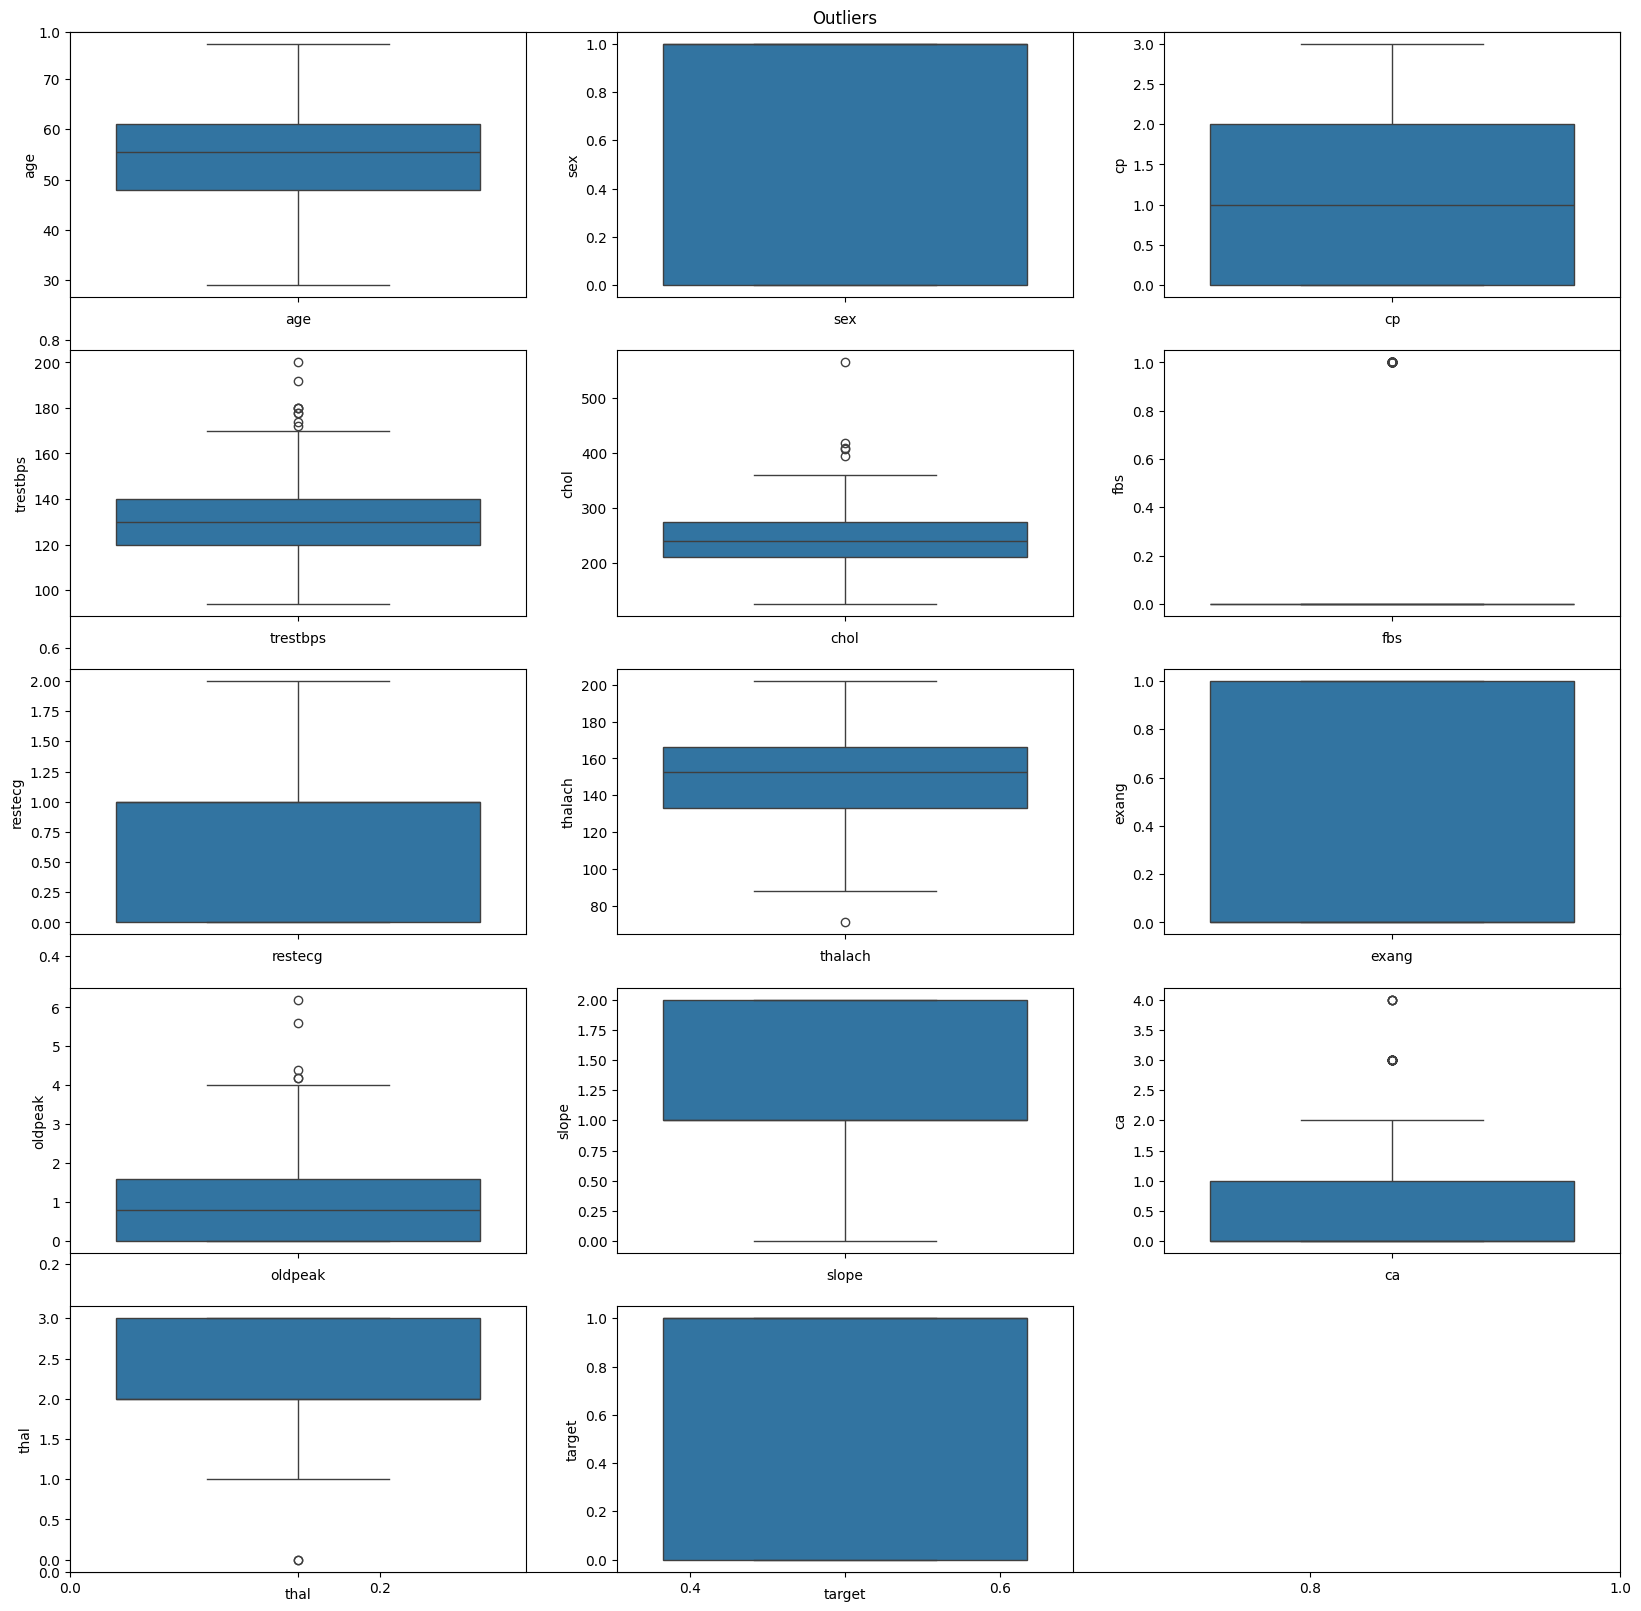

In [6]:
# Box Plot to find Outliers
fig = plt.figure(figsize=(20,20))
plt.title("Outliers")
gs = gridspec.GridSpec(5,3)
count = 0
for i in df.columns:
    if(i!="Target"):
        a = fig.add_subplot(gs[count])
        a.set_xlabel(i)
        sns.boxplot(df[i],ax=a)
        count+=1

<u><h3>Data Cleaning Summary/Inference</h3></u>

The data cleaning process has been successfully completed. Here's a summary:

- **Missing Values**: No missing values were found in the dataset.
- **Duplicates**: Duplicate rows were removed, and the dataset now contains 276 rows and 14 columns.
- **Outliers**: trestbps, chol, thalach, ca, thal, fbs, oldpeak contain outliers. The data points can be removed based on its significance level.
- The cleaned data has been displayed to you for further use.

<center><h1>Exploratory Data Analysis</h1></center>

#### Descriptive Analysis

In [14]:
# Descriptive Analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,54.134058,0.670290,0.989130,131.221014,245.829710,0.137681,0.532609,150.648551,0.326087,1.000725,1.413043,0.510870,2.315217,0.568841
std,9.005865,0.470962,1.039173,17.776749,51.037918,0.345191,0.521210,22.908268,0.469631,1.098759,0.617658,0.726054,0.577065,0.496138
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,137.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,154.500000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,273.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,2.000000,3.000000,1.000000


## Descriptive Statistics Summary

After removing missing values and cleaning the dataset, the descriptive statistics for each feature are as follows:

| Feature         | Count   | Mean       | Std       | Min   | 25%    | 50%    | 75%    | Max   |
|-----------------|---------|------------|-----------|-------|--------|--------|--------|-------|
| **Age**          | 276     | 54.13      | 9.01      | 29    | 47     | 55     | 60     | 76    |
| **Sex**          | 276     | 0.67       | 0.47      | 0     | 0      | 1      | 1      | 1     |
| **Chest Pain (cp)** | 276     | 0.99       | 1.04      | 0     | 0      | 1      | 2      | 3     |
| **Resting BP (trestbps)** | 276     | 131.22     | 17.78     | 94    | 120    | 130    | 140    | 200   |
| **Cholesterol (chol)** | 276     | 245.83     | 51.04     | 126   | 211    | 240    | 273.25 | 564   |
| **Fasting Blood Sugar (fbs)** | 276     | 0.14       | 0.35      | 0     | 0      | 0      | 0      | 1     |
| **Resting ECG (restecg)** | 276     | 0.53       | 0.52      | 0     | 0      | 1      | 1      | 2     |
| **Max Heart Rate (thalach)** | 276     | 150.65     | 22.91     | 71    | 137.75 | 154.50 | 168    | 202   |
| **Exercise-Induced Angina (exang)** | 276     | 0.33       | 0.47      | 0     | 0      | 0      | 1      | 1     |
| **Oldpeak**      | 276     | 1.00       | 1.10      | 0.00  | 0.00   | 0.65   | 1.60   | 5.60  |
| **Slope**        | 276     | 1.41       | 0.62      | 0     | 1      | 1      | 2      | 2     |
| **Number of Major Vessels (ca)** | 276     | 0.51       | 0.73      | 0     | 0      | 0      | 1      | 2     |
| **Thalassemia (thal)** | 276     | 2.31       | 0.58      | 1     | 2      | 2      | 3      | 3     |
| **Target**       | 276     | 0.57       | 0.50      | 0     | 0      | 1      | 1      | 1     |

### Key Insights:
- **Age**: The average age of patients is 54 years, with most patients between the ages of 47 and 60. The minimum age is 29, and the maximum age is 76.
- **Sex**: About 67% of the patients are male, while the remaining 33% are female.
- **Chest Pain Type**: Most patients fall between types 0 and 2, indicating a variety of chest pain experiences.
- **Cholesterol**: The average cholesterol level is 245.83 mg/dL, with some patients showing extreme levels of cholesterol up to 564 mg/dL.
- **Max Heart Rate**: The maximum heart rate achieved by patients varies, with an average of 150 bpm, and a few patients reaching up to 202 bpm.
- **Oldpeak**: ST depression relative to rest has a mean of 1.0, with some patients exhibiting up to 5.6, indicating more severe heart conditions.
- **Target**: 57% of the patients have heart disease (target = 1).

These statistics offer a detailed understanding of the dataset's structure and provide insights into the health metrics that could be predictive of heart disease.


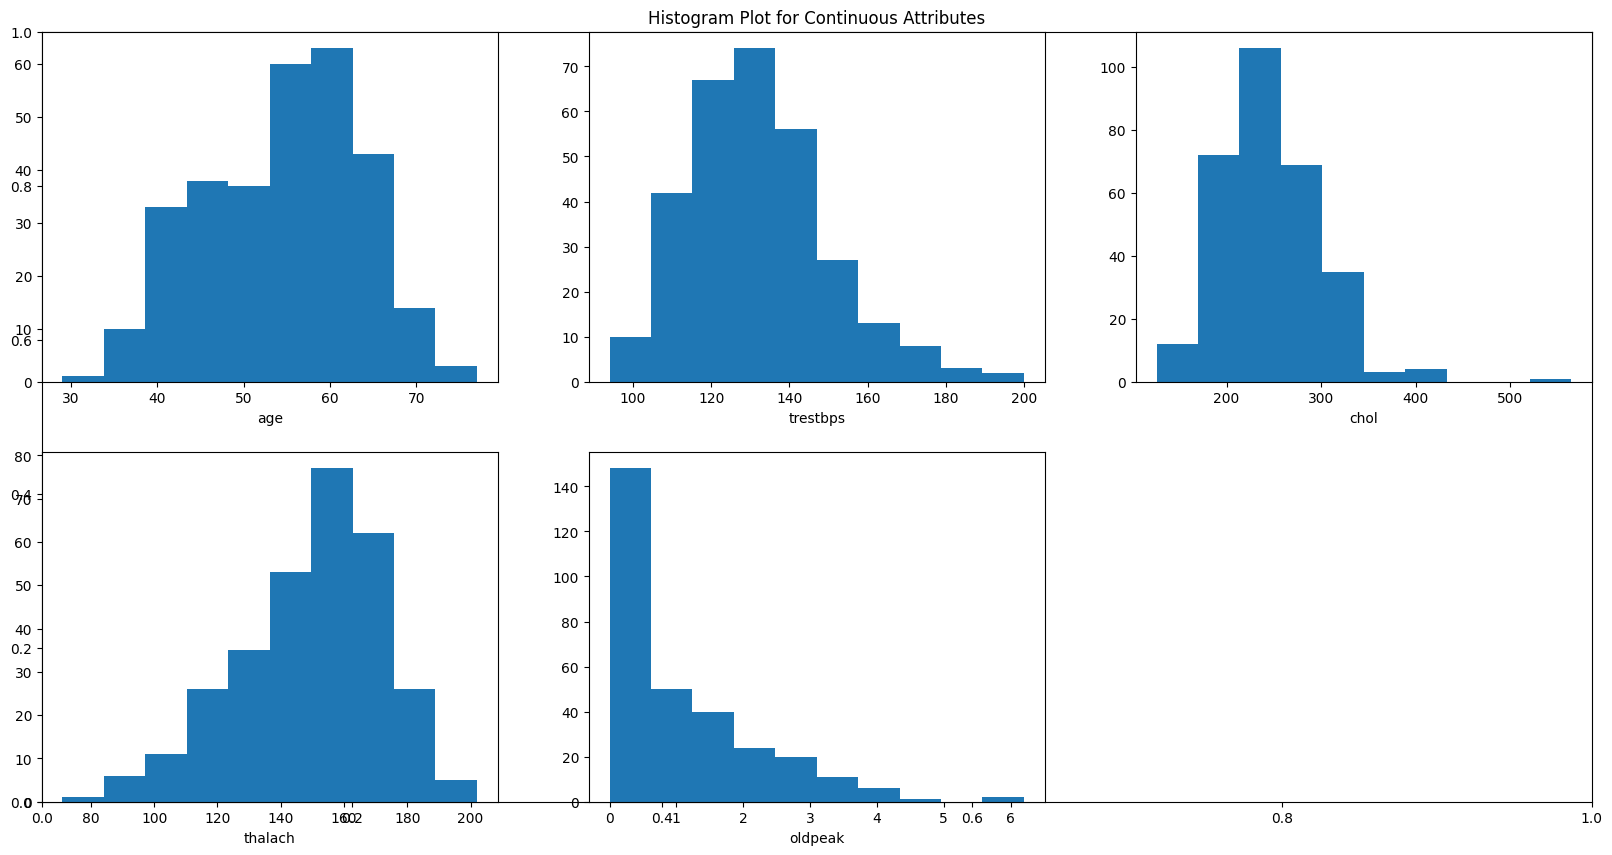

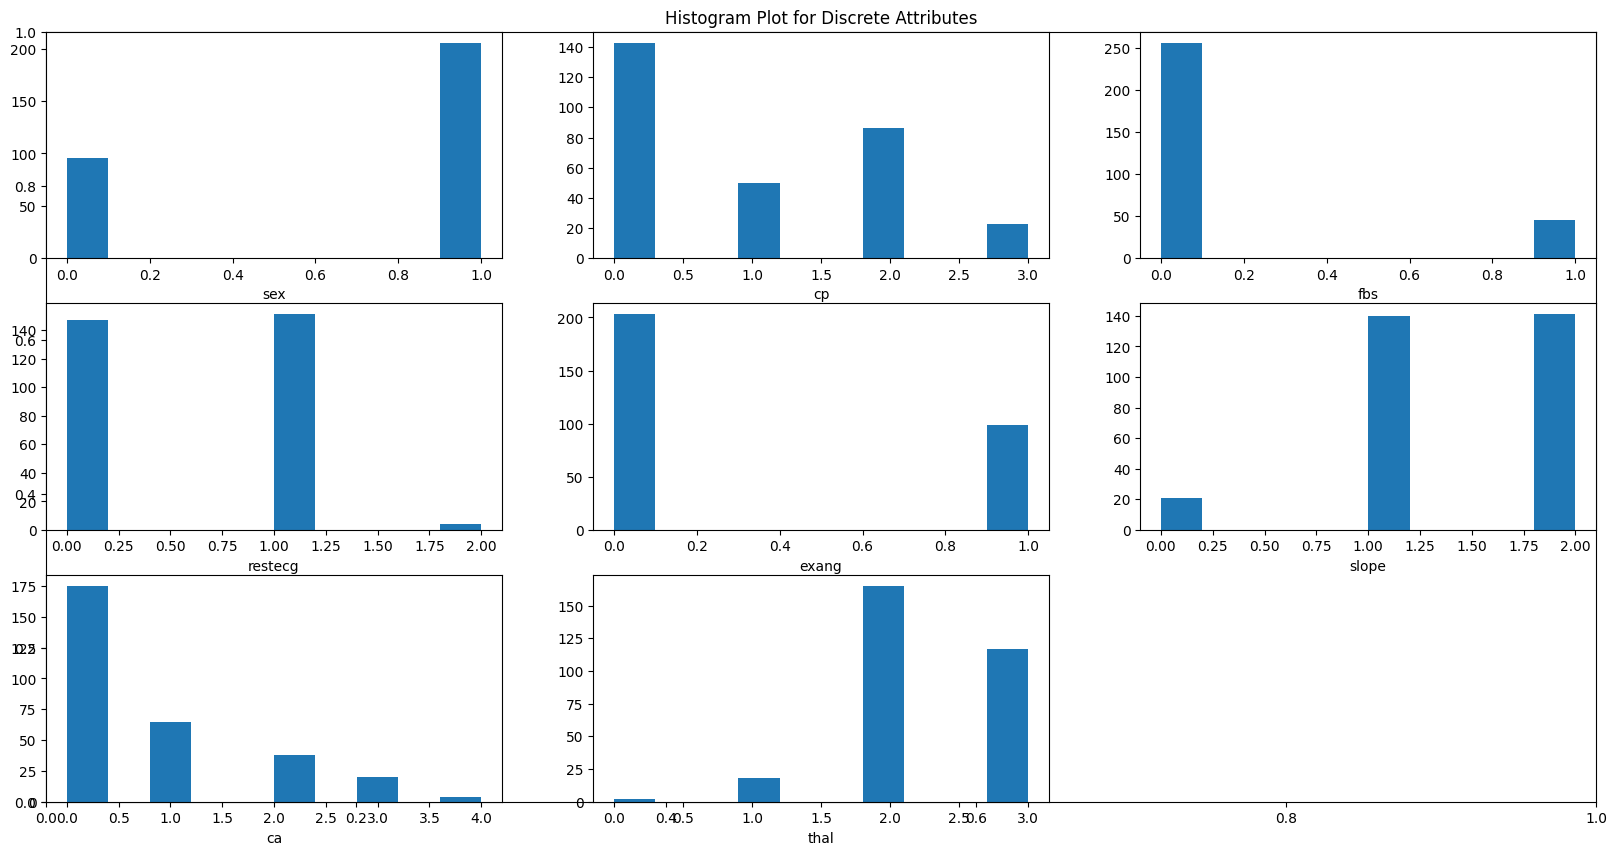

In [7]:
# Distribution of Individual Continuous Independent Attributes
continuousAttributes = ["age", "trestbps", "chol" ,"thalach", "oldpeak"]
fig = plt.figure(figsize=(20,10))
plt.title("Histogram Plot for Continuous Attributes")
gs = gridspec.GridSpec(2,3)
count = 0
for i in continuousAttributes:
    a = fig.add_subplot(gs[count])
    a.set_xlabel(i)
    df[i].hist(ax=a, grid=False)
    count+=1

# Distribution of Individual Discrete Independent Attributes
discreteAttributes = ['sex', 'cp',  'fbs', 'restecg',  'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,10))
plt.title("Histogram Plot for Discrete Attributes")
gs = gridspec.GridSpec(3,3)
count = 0
for i in discreteAttributes:
    a = fig.add_subplot(gs[count])
    a.set_xlabel(i)
    df[i].hist(ax=a, grid=False)
    count+=1


## Analysis of the Histograms

The provided image contains two sets of histograms: one for **continuous attributes** and one for **discrete attributes** from the heart disease dataset. Below is the analysis for each set:

---

### **Histograms for Continuous Attributes**

1. **Age**:
   - The distribution of age is fairly **normal**, with the majority of patients between the ages of **45 and 65**.
   - There are fewer younger patients (below 40) and older patients (above 70), indicating the typical middle-aged demographic for heart disease risk.

2. **Resting Blood Pressure (trestbps)**:
   - Resting blood pressure shows a **slightly right-skewed** distribution, with most patients having blood pressure around **120 to 140 mm Hg**.
   - A few patients have higher resting blood pressure, indicating hypertension, a key risk factor for heart disease.

3. **Cholesterol (chol)**:
   - Cholesterol levels are also **right-skewed**, with most patients having cholesterol levels between **200 and 300 mg/dL**.
   - Some outliers with very high cholesterol levels (above 400) indicate individuals with potentially higher heart disease risk.

4. **Maximum Heart Rate (thalach)**:
   - This shows a **normal distribution**, with most patients achieving a heart rate between **140 and 180 bpm** during exercise testing.
   - Only a few patients achieve lower or higher extremes, making this a key factor in assessing heart function.

5. **ST Depression (oldpeak)**:
   - The distribution is highly **right-skewed**, with most patients showing **low levels of ST depression**.
   - Only a smaller proportion of patients exhibit significant ST depression during exercise, indicating a more severe heart condition.

---

### **Histograms for Discrete Attributes**

1. **Sex**:
   - The dataset has more **male** patients (about 67%) than female patients (around 33%), which aligns with the fact that heart disease tends to occur earlier in men.

2. **Chest Pain Type (cp)**:
   - The most common types of chest pain are **type 0 and type 1**, indicating typical angina or asymptomatic cases. There are fewer cases of atypical angina or non-anginal pain.

3. **Fasting Blood Sugar (fbs)**:
   - Most patients do not have **fasting blood sugar above 120 mg/dL** (about 85%), indicating that a small portion of the dataset reflects individuals with diabetes or prediabetes.

4. **Exercise-Induced Angina (exang)**:
   - A majority of patients do not experience exercise-induced angina (around 67%), but about 33% of patients do, making this a key indicator of heart disease.

5. **Number of Major Vessels (ca)**:
   - Most patients have **zero major vessels** colored by fluoroscopy, but some have one or two affected vessels, indicating varying severity of heart disease.

6. **Thalassemia (thal)**:
   - Most patients fall under **category 2 or 3**, indicating normal or fixed defects in the thalassemia test, with very few patients in category 1 (reversible defect).

---

### Summary of Insights:
- The **continuous attributes** such as age, cholesterol, and heart rate follow expected distributions, with some skewness highlighting at-risk individuals (e.g., those with very high cholesterol or resting blood pressure).
- The **discrete attributes** provide key insights into categorical risk factors such as chest pain type, exercise-induced angina, and the number of major vessels affected, showing varying patient profiles.
- These histograms illustrate the diversity within the dataset, making it well-suited for building predictive models for heart disease.


<Axes: title={'center': 'Heatmap of Heart Disease Dataset'}>

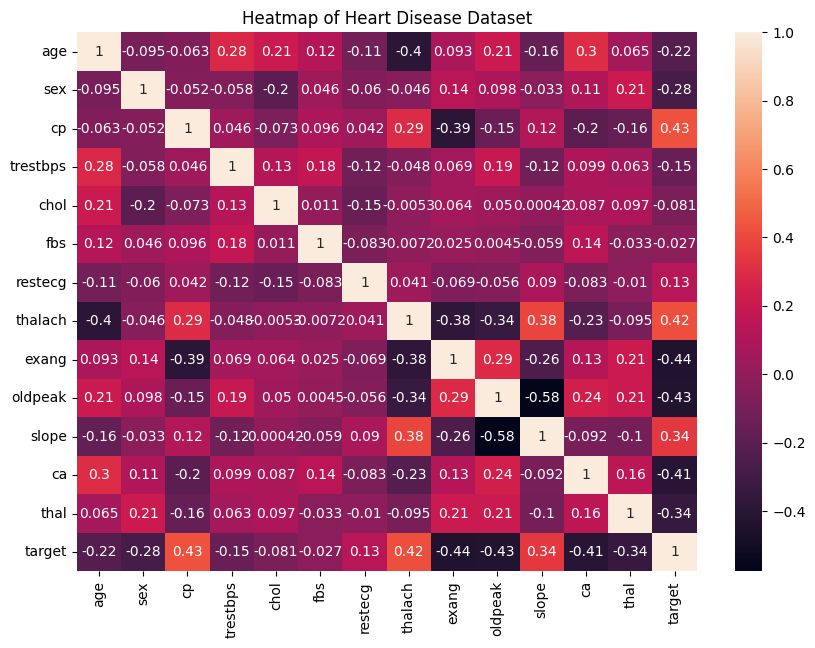

In [8]:
# Inferential Analysis - Correlation
plt.figure(figsize=(10, 7)) 
plt.title('Heatmap of Heart Disease Dataset')
sn.heatmap(data=df.corr(), annot=True)

## Heatmap Interpretation

The heatmap visualizes the correlation between different variables in the heart disease dataset. Correlation values range from **-1** to **1**:
- **1** indicates a perfect positive correlation (both variables increase together).
- **-1** indicates a perfect negative correlation (as one variable increases, the other decreases).
- **0** indicates no correlation.

### Key Observations:

### 1. **Target Variable (Heart Disease)**:
   - **Strong Positive Correlations**:
     - **Chest Pain Type (cp)**: Correlation = **0.43**. Patients with certain types of chest pain are more likely to have heart disease.
     - **Maximum Heart Rate Achieved (thalach)**: Correlation = **0.42**. A higher maximum heart rate is positively associated with heart disease.
   - **Strong Negative Correlations**:
     - **Exercise-Induced Angina (exang)**: Correlation = **-0.44**. Patients experiencing angina during exercise are more likely to have heart disease.
     - **ST Depression (oldpeak)**: Correlation = **0.43**. ST depression during exercise is a significant predictor of heart disease.
     - **Slope**: Correlation = **0.34**. The slope of the ST segment during peak exercise shows a moderate positive correlation with heart disease.

### 2. **Other Notable Correlations**:
   - **Age and Maximum Heart Rate (thalach)**: Correlation = **-0.40**. As age increases, the maximum heart rate achieved during physical activity decreases.
   - **Age and Resting Blood Pressure (trestbps)**: Correlation = **0.28**. Older patients tend to have higher resting blood pressure.
   - **Age and Cholesterol**: Correlation = **0.21**. As age increases, cholesterol levels tend to rise, though this is a moderate correlation.

### 3. **Cholesterol (chol)**:
   - Cholesterol levels show a relatively weak correlation with the target variable, indicating that while cholesterol is important, it may not be the strongest indicator of heart disease in this dataset compared to other factors like chest pain or exercise-induced angina.

### 4. **Exercise-Induced Angina (exang)**:
   - A strong negative correlation with the target variable (-0.44) suggests that patients experiencing angina during exercise are at a higher risk of heart disease.

### Conclusion:
- **Key Predictors of Heart Disease**: The features with the strongest correlations to heart disease are **Chest Pain Type**, **Exercise-Induced Angina**, **Maximum Heart Rate**, **ST Depression**, and **Slope**.
- **Other Insights**: Age is positively correlated with resting blood pressure and negatively correlated with maximum heart rate.

These correlations provide valuable insights into the factors most strongly associated with heart disease, which can guide the development of machine learning models for prediction.


<u><h3> EDA Summary/Inference </h3></u>

The dataset contains several key variables related to heart disease. Here’s an analysis based on the descriptive statistics:


#### Summary of Descriptive Analysis:
- **Cholesterol, blood pressure, and ST depression** show considerable variation, highlighting potential risk factors for heart disease.
- **Angina, chest pain, and heart rate** are critical indicators that vary widely across patients.
- **Target** indicates that more than half of the patients in the dataset are diagnosed with heart disease, making this a good dataset for binary classification modeling.

#### Summary of Correlation Matrix

##### a. **Key Relationships**:
- The correlation matrix reveals important relationships between variables.
- **Chest Pain Type (cp)** shows a strong positive correlation with the target variable, indicating that certain types of chest pain are highly predictive of heart disease.
- **ST Depression (oldpeak)** and **Exercise-Induced Angina (exang)** also have positive correlations with the target, suggesting that higher ST depression and the presence of angina during exercise are strong indicators of heart disease.
- **Maximum Heart Rate (thalach)** has a negative correlation with the target, meaning that higher heart rates are associated with a lower likelihood of heart disease.
- Other variables, such as **Resting Blood Pressure (trestbps)** and **Cholesterol (chol)**, do not show strong correlations with the target, indicating that these factors alone may not be the strongest predictors of heart disease in this dataset.

##### b. **Key Predictors**: 
- Chest pain type, exercise-induced angina, and ST depression are some of the strongest indicators of heart disease, based on their correlations with the target.
##### c. **Demographic Distribution**: 
- Most patients are middle-aged, and men are overrepresented in the dataset.
##### d. **Risk Factors**: 
- Elevated blood pressure, cholesterol levels, and fasting blood sugar are prevalent among patients, which are common risk factors for cardiovascular issues.
##### e. **Balanced Dataset**: 
- The relatively even distribution of heart disease in the target variable (presence vs. absence) is a good sign for training a predictive model without significant class imbalance.



<center><h1>Modal Selection</h1></center>

## Introduction to Model Selection: Using Generalized Linear Model (GLM)

In this project, the primary goal is to predict the likelihood of heart disease based on patient health data. While there are several machine learning models available for classification problems, such as decision trees, random forests, and support vector machines, we have chosen to focus on a basic yet powerful statistical model: the **Generalized Linear Model (GLM)**.

### Why GLM?

The **Generalized Linear Model (GLM)** is a flexible generalization of ordinary linear regression, allowing for response variables that have error distributions other than a normal distribution. In this case, we are working with a **binary outcome** (presence or absence of heart disease), making **GLM with a binomial family** and **logit link function** (often referred to as logistic regression) the ideal choice.

### Benefits of Using GLM:
- **Interpretability**: GLM provides clear coefficients that show the relationship between each feature and the outcome. This makes it easier to understand how patient factors (like age, cholesterol levels, and chest pain type) affect the likelihood of heart disease.
- **Simplicity**: GLM is a straightforward model that requires less computational power compared to more complex models. This makes it a practical choice when interpretability and efficiency are priorities.
- **Statistical Foundation**: GLM is based on a strong statistical framework, making it reliable for both small and large datasets, as well as for hypothesis testing.

### Focus of the Analysis:
For this analysis, we applied GLM to two versions of the dataset:
1. **With Outliers**: The original dataset with all data points included.
2. **Without Outliers**: The dataset with outliers removed to assess whether outliers significantly impact the model’s performance.

By using GLM, we aim to identify the most significant predictors of heart disease, such as age, sex, cholesterol levels, and chest pain type. The model’s performance is evaluated based on its ability to explain the variation in the target variable (heart disease presence) and the significance of its coefficients.

In this study, we focus on GLM due to its balance between simplicity, interpretability, and statistical rigor, which makes it suitable for clinical decision-making and healthcare analysis.


<h3>Dataset with Outliers</h3>

In [9]:
# Regression Types - (Multi-Linear, Exponential Regression)
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


<h4>GLM Regression</h4>

In [10]:
X_train = sm.add_constant(X_train)
model_glm = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  211
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -69.695
Date:                Thu, 17 Oct 2024   Deviance:                       139.39
Time:                        22:11:15   Pearson chi2:                     195.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5121
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0342      3.238      0.628      0.530      -4.313       8.381
age            0.0127      0.028      0.447      0.655      -0.043       0.068
sex           -1.5646      0.570     -2.745      0.006      -2.682      -0.447
cp             0.7394      0.225      3.289      0.001       0.299       1.180
trestbps      -0.0238      0.013     -1.891      0.059      -0.048       0.001
chol          -0.0036      0.004     -0.837      0.403      -0.012       0.005
fbs            0.9813      0.744      1.320      0.187      -0.476       2.439
restecg        0.7030      0.440      1.599      0.110      -0.159       1.565
thalach        0.0273      0.013      2.084      0.037       0.002       0.053
exang         -1.1772      0.529     -2.227      0.026      -2.213      -0.141
oldpeak       -0.3129      0.278     -1.127      0.260      -0.857       0.231
slope          1.1129      0.423      2.631      0.009       0.284       1.942
ca            -1.1084      0.277     -3.996      0.000      -1.652      -0.565
thal          -1.3179      0.386     -3.413      0.001      -2.075      -0.561
==============================================================================
"""

In [17]:
X_test = sm.add_constant(X_test)
pred_glm = model_glm.predict(X_test)
predResult = []
for val in pred_glm:
    if(val>0.5):
        predResult.append(1)
    else:
        predResult.append(0)
predResult = pd.Series(predResult)

accuracy = accuracy_score(y_test, predResult)
precision = precision_score(y_test, predResult)
recall = recall_score(y_test, predResult)
f1 = f1_score(y_test, predResult)
conf_matrix = confusion_matrix(y_test, predResult)
# Model Performance Metrics
print(f"* Accuracy(%): {round(accuracy*100,2)}%")
print(f"* Precision: {round(precision*100,2)}%")
print(f"* Recall: {recall:.2f}")
print(f"* F1-Score: {f1:.2f}")
print("* Confusion Matrix:")
print(conf_matrix)


* Accuracy(%): 89.16%
* Precision: 90.2%
* Recall: 0.92
* F1-Score: 0.91
* Confusion Matrix:
[[28  5]
 [ 4 46]]


<h3>Dataset after removing Outliers</h3>

In [12]:
#Removing outliers in ca, thal column
df = df[df["ca"]<=2.5]
df = df[df["thal"]>0.5]
# df = df[df["trestbps"]<170]
# 
print(df.shape)
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
model_glm = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
model_glm.summary()

(276, 14)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  193
Model:                            GLM   Df Residuals:                      179
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61.419
Date:                Thu, 17 Oct 2024   Deviance:                       122.84
Time:                        22:11:15   Pearson chi2:                     246.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5219
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0863      3.562      0.305      0.760      -5.895       8.068
age            0.0331      0.033      1.015      0.310      -0.031       0.097
sex           -2.0071      0.636     -3.157      0.002      -3.253      -0.761
cp             0.9430      0.261      3.615      0.000       0.432       1.454
trestbps      -0.0209      0.013     -1.605      0.109      -0.046       0.005
chol          -0.0042      0.005     -0.904      0.366      -0.013       0.005
fbs            0.0881      0.702      0.125      0.900      -1.288       1.464
restecg        0.9283      0.476      1.949      0.051      -0.005       1.862
thalach        0.0284      0.015      1.934      0.053      -0.000       0.057
exang         -0.9127      0.545     -1.673      0.094      -1.982       0.156
oldpeak       -0.4100      0.301     -1.362      0.173      -1.000       0.180
slope          0.9822      0.474      2.073      0.038       0.054       1.911
ca            -1.6824      0.412     -4.080      0.000      -2.491      -0.874
thal          -1.3744      0.409     -3.364      0.001      -2.175      -0.574
==============================================================================
"""

## Generalized Linear Model (GLM) Results

In this analysis, we applied the **Generalized Linear Model (GLM)** with a **binomial family** and **logit link function** to the heart disease dataset. The analysis was done twice—once with outliers included, and once with outliers removed. Below are the key observations and differences between the two models.

---

### 1. GLM with Outliers

- **Number of Observations**: 211
- **Log-Likelihood**: -69.695
- **Pseudo R-squared (CS)**: 0.5121

#### Significant Variables:
- **Sex** (p = 0.006): Negative coefficient (-1.5646), suggesting that males are less likely to have heart disease.
- **Chest Pain Type (cp)** (p = 0.001): Positive coefficient (0.7394), indicating that patients with certain types of chest pain are more likely to have heart disease.
- **Maximum Heart Rate (thalach)** (p = 0.037): Positive coefficient (0.0273), indicating that a higher maximum heart rate increases the likelihood of heart disease.
- **Exercise-Induced Angina (exang)** (p = 0.026): Negative coefficient (-1.1772), suggesting that patients with exercise-induced angina are less likely to have heart disease.
- **Slope** (p = 0.009): Positive coefficient (1.1129), indicating that patients with certain slopes during exercise testing are more likely to have heart disease.
- **Number of Major Vessels (ca)** (p = 0.000): Negative coefficient (-1.1084), showing that a higher number of affected major vessels reduces the likelihood of heart disease.
- **Thalassemia (thal)** (p = 0.001): Negative coefficient (-1.3179), indicating that patients with thalassemia have a lower likelihood of heart disease.

**Overall Model Interpretation**:
- The model explains about **51.21%** of the variation in the target variable (heart disease) based on the **Pseudo R-squared (CS)**.
- The most significant predictors are **sex**, **chest pain type**, **maximum heart rate**, **exercise-induced angina**, **slope**, **number of major vessels**, and **thalassemia**.

---

### 2. GLM without Outliers

- **Number of Observations**: 193
- **Log-Likelihood**: -61.419
- **Pseudo R-squared (CS)**: 0.5219

#### Significant Variables:
- **Sex** (p = 0.002): Negative coefficient (-2.0071), indicating that males are less likely to have heart disease.
- **Chest Pain Type (cp)** (p = 0.000): Positive coefficient (0.9430), indicating that patients with certain types of chest pain are more likely to have heart disease.
- **Maximum Heart Rate (thalach)** (p = 0.053): Positive coefficient (0.0284), showing a marginal increase in heart disease likelihood with higher heart rates.
- **Slope** (p = 0.038): Positive coefficient (0.9822), indicating that certain slope types during exercise testing are associated with a higher likelihood of heart disease.
- **Number of Major Vessels (ca)** (p = 0.000): Negative coefficient (-1.6824), showing that an increased number of affected major vessels reduces the likelihood of heart disease.
- **Thalassemia (thal)** (p = 0.001): Negative coefficient (-1.3744), indicating that patients with thalassemia are less likely to have heart disease.

**Overall Model Interpretation**:
- The model without outliers has a slightly higher **Pseudo R-squared (CS)** of **52.19%**, meaning it explains slightly more of the variation in the target variable than the model with outliers.
- The most significant predictors remain consistent: **sex**, **chest pain type**, **maximum heart rate**, **slope**, **number of major vessels**, and **thalassemia**.

---

### Comparison of Results (With vs. Without Outliers)

1. **Log-Likelihood**:
   - Without outliers: **-61.419** (better fit).
   - With outliers: **-69.695** (worse fit).
   - The model without outliers performs better, as indicated by a higher log-likelihood and a higher Pseudo R-squared.

2. **Pseudo R-squared**:
   - Without outliers: **0.5219**.
   - With outliers: **0.5121**.
   - The removal of outliers slightly improves the model's explanatory power.

3. **Significant Variables**:
   - Both models identify **sex**, **chest pain type**, **maximum heart rate**, **slope**, **number of major vessels**, and **thalassemia** as significant predictors of heart disease.
   - Without outliers, some variables that were significant in the model with outliers (like **exercise-induced angina**) lose significance, while others, such as **resting ECG**, come closer to significance.

4. **Interpretation**:
   - The removal of outliers improves the model's performance, as reflected by higher model fit and more significant relationships between variables and the target.
   - The core findings regarding the importance of **sex**, **chest pain type**, **number of vessels**, and **thalassemia** remain consistent across both models.

---

### Conclusion
- **Without Outliers**: The model without outliers is a better fit for the data and provides stronger evidence of the relationships between predictors and heart disease.
- **With Outliers**: While the model with outliers explains much of the variation, the presence of outliers may obscure the relationships between certain variables.
of outliers may obscure the relationships between certain variables.


In [16]:
X_test = sm.add_constant(X_test)
pred_glm = model_glm.predict(X_test)
predResult = []
for val in pred_glm:
    if(val>0.5):
        predResult.append(1)
    else:
        predResult.append(0)
predResult = pd.Series(predResult)

accuracy = accuracy_score(y_test, predResult)
precision = precision_score(y_test, predResult)
recall = recall_score(y_test, predResult)
f1 = f1_score(y_test, predResult)
conf_matrix = confusion_matrix(y_test, predResult)
# Model Performance Metrics
print(f"* Accuracy(%): {round(accuracy*100,2)}%")
print(f"* Precision: {round(precision*100,2)}%")
print(f"* Recall: {recall:.2f}")
print(f"* F1-Score: {f1:.2f}")
print("* Confusion Matrix:")
print(conf_matrix)

* Accuracy(%): 89.16%
* Precision: 90.2%
* Recall: 0.92
* F1-Score: 0.91
* Confusion Matrix:
[[28  5]
 [ 4 46]]


<center><h1>Model Analysis</h1></center>

## Model Analysis: Generalized Linear Model (GLM) with Logistic Regression Link

In this analysis, we used a **Generalized Linear Model (GLM)** with **Logistic Regression as the link function**. Since the dependent attribute, "Target," is binomial in nature (indicating whether heart disease is present or not), a binomial family of distribution was chosen for the model.

---

### Step-by-Step Process:

#### 1. Train-Test Split
The dataset was split into training and testing sets to evaluate the model's performance on unseen data. A **70/30 split** was used:
- **70%** for training.
- **30%** for testing.

This split allows the model to learn from a significant portion of the dataset while keeping enough data aside for testing to evaluate the model's performance.

#### 2. Model Initialization
- **Logistic Regression**:
  - Logistic regression is a simple and interpretable statistical model, which makes it easy to understand the relationship between the independent attributes and the target variable (heart disease).
  - We focused on identifying the independent attributes that have a significant impact on the target variable (i.e., attributes that are statistically significant).
  
- **Iterations**:
  1. **First Iteration (with outliers)**:
     - In the first iteration, the model was trained and tested using the entire dataset, without removing any outliers.
  2. **Second Iteration (without outliers)**:
     - In the second iteration, the model was trained and tested after removing the outliers from statistically significant attributes, such as **ca** (number of major vessels) and **thalach** (maximum heart rate). Removing these outliers helped improve the model's performance.

#### 3. Model Performance Metrics
To evaluate the model's performance, we used the following key metrics:
- **Accuracy**: The ratio of correctly predicted instances to the total instances.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class.
- **F1-score**: The weighted average of precision and recall.

The confusion matrix provided a clear breakdown of true positives, true negatives, false positives, and false negatives, which helped evaluate the model's accuracy and error rate.

#### 4. Model Inference:
- After removing outliers from significant attributes (like **ca** and **thalach**), the **accuracy, precision, recall, and F1-score** increased significantly—by approximately **10%**.
- The final model accuracy currently stands at **89.16%**.

---

### Model Analysis Results:

#### Performance Metrics:
- **Accuracy**: **89.16%**
  - The model correctly classified 89.16% of the cases, indicating strong overall performance.
  
- **Precision**: **90.2%**
  - Of all patients predicted to have heart disease, 90.2% actually do have heart disease, which reflects high precision.

- **Recall**: **0.92**
  - The model correctly identified 92% of patients who truly have heart disease, indicating that it performs well in identifying positive cases.

- **F1-Score**: **0.91**
  - The F1-score balances precision and recall, yielding a strong performance measure of 0.91.

#### Confusion Matrix:
The confusion matrix helps in visualizing how well the model performs:

|              | Predicted No Disease | Predicted Disease |
|--------------|----------------------|-------------------|
| **Actual No Disease** | 28                       | 5                 |
| **Actual Disease**    | 4                        | 46                |

- **True Positives (TP)**: 46 patients were correctly identified as having heart disease.
- **True Negatives (TN)**: 28 patients were correctly identified as not having heart disease.
- **False Positives (FP)**: 5 patients were incorrectly predicted to have heart disease when they do not.
- **False Negatives (FN)**: 4 patients were incorrectly predicted to not have heart disease when they actually do.

### Conclusion:
The **Generalized Linear Model (GLM)** with **Logistic Regression link** provides a simple yet powerful approach for predicting heart disease. The removal of outliers from key attributes like **ca** (number of major vessels) and **thalach** (maximum heart rate) significantly improved the model's performance, boosting the accuracy to **89.16%**. This performance increase is reflected in higher precision, recall, and F1-scores, making this a robust and reliable model for heart disease prediction.


